## <div align="center" style="color:#2dba4e"> A/B Testing</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from rich.jupyter import print as rprint
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_AB=pd.read_csv("./Data/ab_test_click_data.csv")
df_AB.head(5)

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [3]:
rprint(df_AB.describe())

user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000

In [8]:
df_AB.value_counts("group")

group
con    10000
exp    10000
dtype: int64

In [5]:
# checking for number of clicks in experimental group and controlled group
rprint(df_AB.groupby("group").sum("click"))

user_id  click
group                  
con    150005000   1989
exp     50005000   6116

out of 20,000 control group has 1989 clicks that is $\frac{1989}{10000}=0.1989$
out of 20,000 experimental group 6116 clicks that is $\frac{6116}{10000}=0.6116$

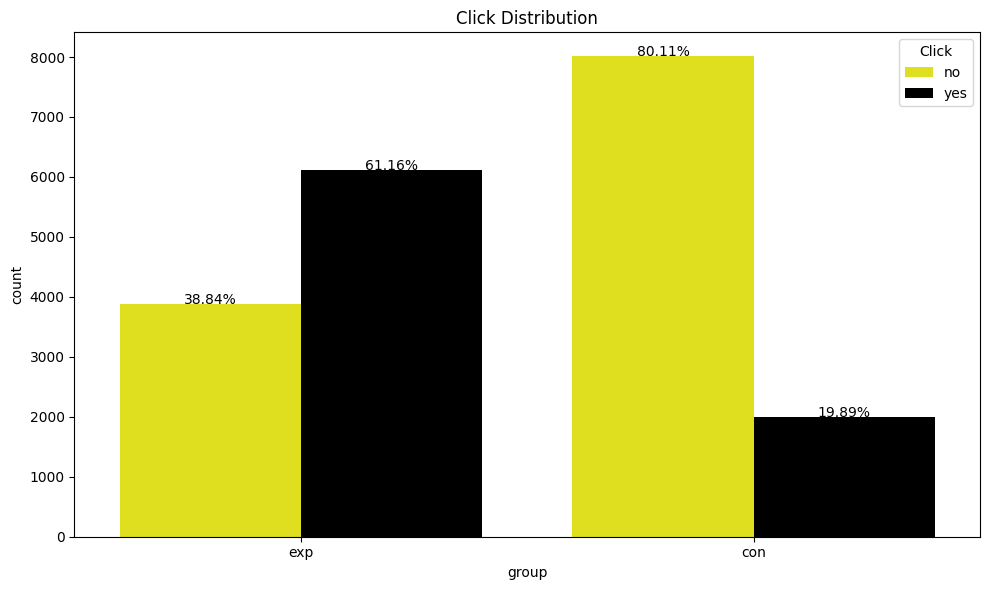

In [10]:
palette={0:"yellow",1:"black"}
plt.figure(figsize=(10,6))
ax=sns.countplot(x="group",hue="click",data=df_AB,palette=palette)
plt.title("Click Distribution")
plt.xlabel("group")
plt.ylabel("count")
plt.legend(title="Click",labels=["no","yes"])


group_count=df_AB.groupby(["group"]).size()
group_click_count=df_AB.groupby(["group","click"]).size().reset_index(name="count")

for i in ax.patches:
    height= i.get_height()
    group = "exp" if i.get_x()<0.5 else "con"
    click =  1 if i.get_x() % 1> 0.5 else 0
    total = group_count.loc[group]
    percentage = 100*height/total
    ax.text(i.get_x() + i.get_width() /2. , height + 3, f'{percentage:.2f}%', ha="center",color="black", fontsize=10)

plt.tight_layout()
plt.show()
